# Different Training Models

- Linear Regression
- Gradient Descent

In [1]:
import numpy as np

numDim = 100
X = 2 * np.random.rand(numDim, 1)
y = 4 + 3 * X + np.random.randn(numDim, 1) # y = 4 + 3x + noise

X.shape, y.shape

((100, 1), (100, 1))

In [2]:
import matplotlib.pyplot as plt

# Plotting X against y
def plot_dataset(X, y, label=None):
    plt.plot(X, y, 'b.')
    plt.axis([0,2,0,15])
    plt.xlabel('X1')
    plt.ylabel('y')

plot_dataset(X, y)

In [3]:
# Normal Equation
# Closed form solution to find theta that minimizes cost function
X_bias = np.c_[np.ones((numDim,1)), X] # add bias term x0 = 1 to each instance
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y) # (XT . X)^-1 * XT * y
theta_best # should be theta0 = 4 and theta1 = 3

array([[4.36398939],
       [2.65929306]])

In [4]:
# Make predictions using theta_best
X_data = np.array([[0], [2]])
X_data_bias = np.c_[np.ones((2,1)), X_data] # add bias term x0 = 1 to each instance
y_predict = X_data_bias.dot(theta_best)
y_predict

array([[4.36398939],
       [9.6825755 ]])

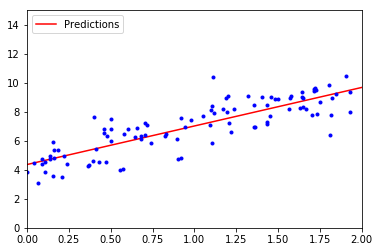

In [5]:
plt.plot(X_data, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.legend(loc="upper left")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
linear_regressor.intercept_, linear_regressor.coef_ # Same result as closed form solution

(array([4.36398939]), array([[2.65929306]]))

In [7]:
# Linear Regression Prediction, same result as closed form solution
linear_regressor.predict(X_data)

array([[4.36398939],
       [9.6825755 ]])

In [8]:
# LinearRegression is based on "least squares" function, np.linalg.lstsq()
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_bias, y, rcond=1e-6)
theta_best_svd

array([[4.36398939],
       [2.65929306]])

In [9]:
# theta_best_predict = X+ . y where X+ is the pseudoinverse of X
np.linalg.pinv(X_bias).dot(y)

array([[4.36398939],
       [2.65929306]])

array([[4.36398939],
       [2.65929306]])

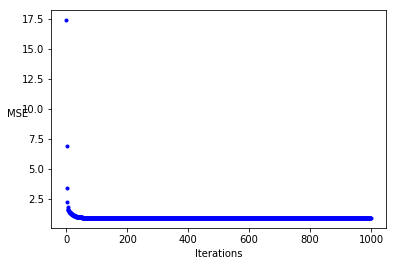

In [10]:
# Batch Gradient Descent
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

# X_bias.shape is (100, 2)
# X_bias.T.shape is (2, 100)

# starts from 0 to n_iterations - 1
for iteration in range(n_iterations): 
    # gradients.shape is (2, 1)
    gradients = 2/m * X_bias.T.dot(X_bias.dot(theta) - y)
    theta = theta - (learning_rate * gradients)
    
    mse = 1/m * sum((X_bias.dot(theta) - y)**2)
    plt.plot(iteration, mse, 'b.')

plt.xlabel('Iterations')
plt.ylabel('MSE', rotation=0)

theta

array([[4.38633127],
       [2.64947822]])

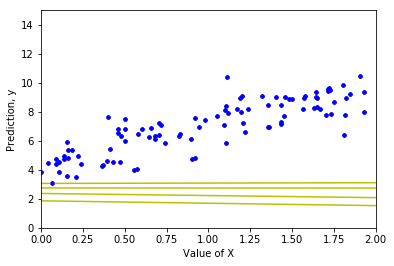

In [11]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule((epoch * m) + i)
        theta = theta - (learning_rate * gradients)
        
        # Prediction for x = 0 and x = 2 based on theta
        if epoch == 0 and i <= 3:
            
            # Predicts for X at the values of 0 and 2
            y_predict = X_data_bias.dot(theta)
            plt.plot(X_data, y_predict, 'y-')
            plt.plot(X, y, 'b.')
            plt.axis([0,2,0,15])

plt.xlabel('Value of X')
plt.ylabel('Prediction, y')

theta

In [12]:
# Stochastic Gradient Descent optimizing squared error cost with default learning rate and no regularization
from sklearn.linear_model import SGDRegressor

# Can attempt using 'l2' as the penalty for regularization
sgd_regressor = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1)

# ravel returns a contiguous flattened array giving (100,) instead of (100, 1)
sgd_regressor.fit(X, y.ravel())

print("The theta from Normal Equation : ", str(theta_best), " vs ")
sgd_regressor.intercept_, sgd_regressor.coef_

The theta from Normal Equation :  [[4.36398939]
 [2.65929306]]  vs 


(array([4.37636951]), array([2.67743285]))

# Polynomial Regression

Text(0, 0.5, 'y2')

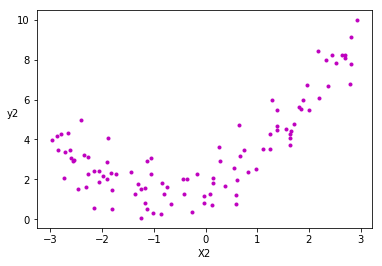

In [13]:
np.random.seed(42)
m = 100

# Values for X2 is between -3 and 3, using rand gives range [0,1]
X2 = 6 * np.random.rand(m, 1) - 3

# using randn gives a normal distribution with mean 0 and variance 1
y2 = (0.5 * X2**2) + X2 + (2 + np.random.randn(m, 1))

plt.plot(X2, y2, 'm.')
plt.xlabel('X2')
plt.ylabel('y2', rotation=0)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly_features.fit_transform(X2)

print("X2_poly gives the original feature and the square of this feature : ", str(X2_poly[0]), " vs ")

X2[0]

X2_poly gives the original feature and the square of this feature :  [-0.75275929  0.56664654]  vs 


array([-0.75275929])

Linear Regressor Intersection point :  [1.78134581]
Linear Regressor Coefficients :  [[0.93366893 0.56456263]]


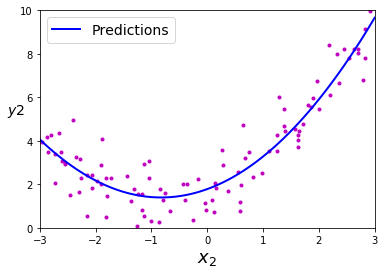

In [15]:
linear_regressor.fit(X2_poly, y2)

# Returns (array([2.06968272]), array([[1.01000996, 0.50923132]]))
# Estimated y2 = 0.51x2^2 + 1.01x2 + 2.06 compared with y2 = (0.5x2^2) + x2 + (2 + Gaussian Noise)
print("Linear Regressor Intersection point : ", str(linear_regressor.intercept_))
print("Linear Regressor Coefficients : ", str(linear_regressor.coef_))

# linspace returns evenly spaced numbers over a specified interval and reshape from (10,)
X2_new = np.linspace(-3, 3, 100).reshape(100, 1)
X2_new_poly = poly_features.transform(X2_new)
y2_new = linear_regressor.predict(X2_new_poly)
plt.plot(X2, y2, "m.")
plt.plot(X2_new, y2_new, "b-", linewidth=2, label="Predictions")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y2$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

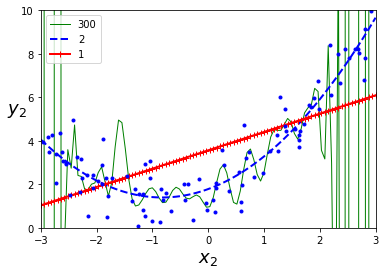

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Plotting polynomial regressions with 3 different degrees
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polylarge_features = PolynomialFeatures(degree=degree, include_bias=False)
    standard_scaler = StandardScaler()
    linear_regressor = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polylarge_features),
            ("std_scaler", standard_scaler),
            ("lin_reg", linear_regressor),
        ])
    polynomial_regression.fit(X2, y2)
    y2_newlarge = polynomial_regression.predict(X2_new)
    plt.plot(X2_new, y2_newlarge, style, label=str(degree), linewidth=width)

plt.plot(X2, y2, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y_2$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

No. Cross Valuation Errors :  79


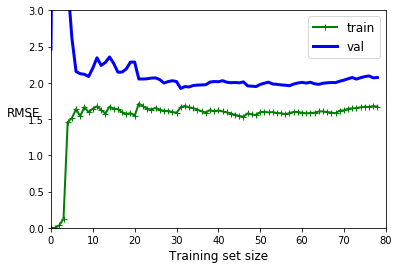

In [17]:
# Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Plotting model's performance on the training set and the validation set as a function of the training set size
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "g-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("RMSE", rotation=0, fontsize=12)
    
    print("No. Cross Valuation Errors : ", len(val_errors))

linear_regressor = LinearRegression()
plot_learning_curves(linear_regressor, X2, y2)
plt.axis([0, 80, 0, 3])
plt.show()

No. Cross Valuation Errors :  79


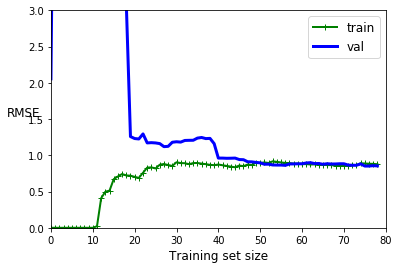

In [18]:
# Learning Curves : Overfitting with 10th degree polynomial model
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_regression", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X2, y2)
plt.axis([0, 80, 0, 3])
plt.show()

In [19]:
# Regularization

In [20]:
# Ridge Regression cost function includes regularization term
from sklearn.linear_model import Ridge

# Closed form solution using a matrix factorization technique by Andre-Louis Cholesky
ridge_regressor = Ridge(alpha=1, solver="cholesky")
ridge_regressor.fit(X2, y2)
ridge_regressor.predict([[1.5], [2]])

array([[4.82497007],
       [5.24544729]])

In [21]:
# Stochastic Gradient Descent with l2 Regularization
sgd_regressor = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", eta0=0.1)

# Ravel returns a contiguous flattened array
sgd_regressor.fit(X2, y2.ravel())
sgd_regressor.predict([[1.5], [2]])

array([4.83415194, 5.25985947])

In [22]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_regressor.fit(X2, y2)
elastic_net_regressor.predict([[1.5], [2]])

array([4.78114505, 5.18857068])

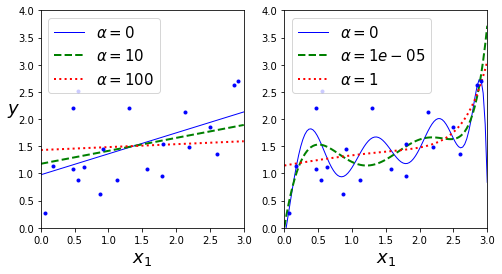

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# same random values generated to provide consistency
np.random.seed(42)
# New values
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + (0.5 * X) + (np.random.randn(m, 1) / 1.5)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    # tuples ((0, 'b-'), (10, 'g--'), (100, 'r:'))
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("standard_scaler", StandardScaler()),
                    ("regularized_regressor_model", model),
                ])
        model.fit(X, y)
        y_new_regularized = model.predict(X_new)
        ln_width = 2 if alpha > 0 else 1
        
        # r is necessary for r"$\alpha = {}$".format(alpha) giving $\alpha = 0$; otherwise $lpha = 0$ having error
        # r"$\alpha = " produces "alpha_symbol = "
        plt.plot(X_new, y_new_regularized, style, linewidth=ln_width, label=r'$\alpha = {}$'.format(alpha))
        #print("Label : ", r'$\alpha = {}$'.format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# Early Stopping

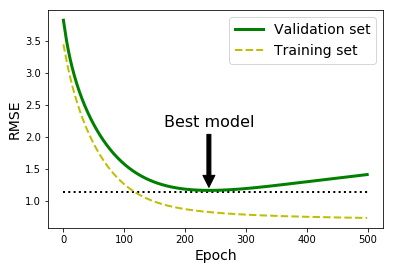

In [24]:
from sklearn.base import clone

# same random values generated to provide consistency
np.random.seed(42)
# New values
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * X**2) + X + (2 + np.random.randn(m, 1))

# ravel returns a contiguous flattened array giving (25,) instead of (25, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# X_train.shape gives (25, 1) and y_train.shape gives (25,)
y_val.shape

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("standard_scaler", StandardScaler()) ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_regressor = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None, eta0=0.0005,
                             warm_start=True, learning_rate="constant", random_state=42)

num_epochs = 500
train_errors, val_errors = [], []
for epochs in range(num_epochs):
    sgd_regressor.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_regressor.predict(X_train_poly_scaled)
    y_val_predict = sgd_regressor.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_value_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_value_rmse),
             xytext=(best_epoch, best_value_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)

# best_epoch, best_value_rmse gives (239, 1.1324590535779684)
best_value_rmse -= 0.03  # Adjust to make the graph to look better

# Plot the horizontal line for best_value_rmse
plt.plot([0, num_epochs], [best_value_rmse, best_value_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "y--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Clone model for basic early stopping implementation

In [25]:
from sklearn.base import clone

# The SGDRegressor has to be defined as it is not carried over from the previous definition above
sgd_regressor = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None, eta0=0.0005,
                             warm_start=True, learning_rate="constant", random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    # With warm_start=True and fit() is called, it will continue where it left off instead of restarting from scratch
    sgd_regressor.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_regressor.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_regressor)

best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
        verbose=0, warm_start=True))

# Logistic Regression

- Binary Classifier

# Sigmoid Function

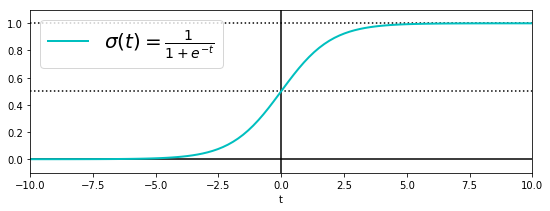

In [26]:
# Logistic Function plot
t = np.linspace(-10, 10, 100)
sigmoid_fn = 1 / (1 + np.exp(-t))

# Plot width, height in inches
plt.figure(figsize=(9, 3))

# Plot vertical axis
plt.plot([-10, 10], [0, 0], "k-")
# Plot horizontal lines
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")

# Plot vertical axis
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sigmoid_fn, "c-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

# Decision Boundaries

In [27]:
from sklearn import datasets
iris_data = datasets.load_iris()
list(iris_data.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [28]:
# iris_data descriptions
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
# iris_data["data"].shape gives (150, 4)
# working on data attribute 4 (ie. petal width)
X = iris_data["data"][:, 3:] # use 3: at column to create shape of (150, 1)

# If class is Iris-Virginica then value is 1; otherwise is 0
y = (iris_data["target"] == 2).astype(np.int) # with shape (150,)

y.shape

(150,)

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(solver="liblinear", random_state=42)
logistic_regressor.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

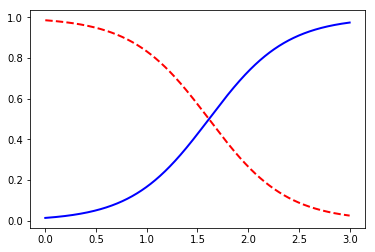

In [31]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_probability = logistic_regressor.predict_proba(X_new)

# Egs: y_probability is [0.98554411, 0.01445589], ... [0.02579136, 0.97420864] with shape (1000, 2)
plt.plot(X_new, y_probability[:, 1], "b-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_probability[:, 0], "r--", linewidth=2, label="Not Iris-Virginica")

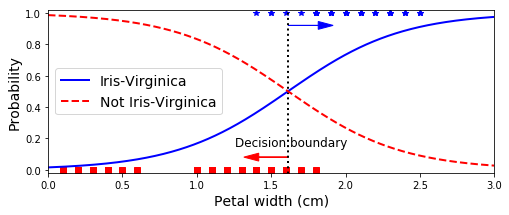

In [32]:
# y_probability[:, 1] # Predictions for Iris-Virginica in second column with each X
# [0] picks the first item with value of 1.61561562 that has y_probability >= 0.5
decision_boundary = X_new[y_probability[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "rs") # display with triangles for y_probability = 0
plt.plot(X[y==1], y[y==1], "b*") # display with asterisks for y_probability = 1

plt.plot([decision_boundary, decision_boundary], [-1, 1.02], "k:", linewidth=2)

plt.plot(X_new, y_probability[:, 1], "b-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_probability[:, 0], "r--", linewidth=2, label="Not Iris-Virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=12, color="k", ha="center")

plt.arrow(decision_boundary, 0.08, -0.2, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary, 0.92, 0.2, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

Predictions for petal width at 1.61 cm and 1.70 cm

In [33]:
print("Decision boundary at", decision_boundary)
y_pred = logistic_regressor.predict([[1.61],[1.70]])
print("Predictions : ", y_pred)

y_pred_logic = [y_pred > 0]
print("Boolean Equivalent : ", y_pred_logic)

Decision boundary at [1.61561562]
Predictions :  [0 1]
Boolean Equivalent :  [array([False,  True])]


# Softmax Regression (Multinomial Logistic Regression) 

- Logistic regression classifier is generalized to support multiple classes directly without having to train and combine multiple binary classifiers
- Predicts only one class at a time, it should be used only with mutually exclusive classes
- Cross Entropy cost function is used

In [34]:
# iris_data["data"].shape gives (150, 4)
# working on data attribute 3 (petal length) and 4 (petal width)
X = iris_data["data"][:, (2,3)] # use columns 2, 3 to create shape of (150, 2)
y = iris_data["target"] # with shape (150,)

softmax_regressor = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_regressor.fit(X,y)

print("The Softmax Regressor predictions", softmax_regressor.predict_proba([[5,2]]))

# petal length of 5 cm and petal width of 2 cm
softmax_regressor.predict([[5,2]]) # gives class 2 which is Iris-Virginica with a 94.25% probability

The Softmax Regressor predictions [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


array([2])

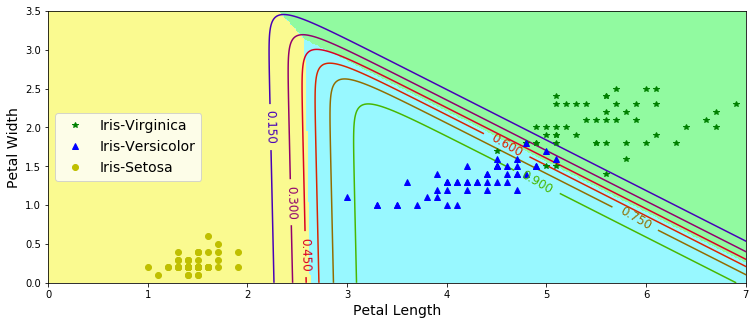

In [35]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),   # petal length
    np.linspace(0, 3.5, 200).reshape(-1, 1)) # petal width

# x0.shape and x1.shape are (200, 500)
# x0.ravel().shape x1.ravel().shape and are (100000,)
# X_new.shape is (100000, 2)
X_new = np.c_[x0.ravel(), x1.ravel()]

# y_probability.shape is (100000, 3)
y_probability = softmax_regressor.predict_proba(X_new)

# y_predict with values [0,1,2] and y_predict.shape is (100000,)
y_predict = softmax_regressor.predict(X_new)

# Choosing the probability for Iris-Versicolor with value of 1
zz_versi_prob = y_probability[:, 1].reshape(x0.shape) # zz_pl_prob.shape is (200, 500)
zz_versi_predict = y_predict.reshape(x0.shape)        # zz_pl_predict.shape is (200, 500)

plt.figure(figsize=(12.5, 5))

# Plot petal length X[:,0] against petal width X[:,1]
# X[y==2, 0].shape, X[y==1, 0].shape, X[y==2, 0].shape are (50,)
plt.plot(X[y==2, 0], X[y==2, 1], "g*", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "b^", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
# Region colors in order of Iris-Setosa, Iris-Versicolor, Iris-Virginica
custom_cmap = ListedColormap(['#fafa90','#98f8ff','#91faa0'])
plt.contourf(x0, x1, zz_versi_predict, cmap=custom_cmap)

# Plotting the contours with the probabilities
contour = plt.contour(x0, x1, zz_versi_prob, cmap=plt.cm.brg)
# Show the contour labels
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

# Helper functions for understanding :

In [36]:
# creates a new tuples containing elements from the respective iterable elements:
alphas = (0, 10, 100)
newlist = zip(alphas, ("b-", "g--", "r:"))

print(tuple(newlist))

((0, 'b-'), (10, 'g--'), (100, 'r:'))


In [37]:
# creates a new tuples containing elements from the respective iterable elements:
alphas = (0, 10, 100, 1000)
newlist = zip(("index1", "index2", "index3", "index4"), alphas, ("b-", "g--", "r:"))

print(tuple(newlist))
#list(newlist) # creates a list from the tuples having square brackets

(('index1', 0, 'b-'), ('index2', 10, 'g--'), ('index3', 100, 'r:'))


In [38]:
# String Formatting
c = 5-7j

# Accessing arguments’ attributes
('The complex number {0} is formed with the real part as {0.real} and the imaginary part as {0.imag}.').format(c)

'The complex number (5-7j) is formed with the real part as 5.0 and the imaginary part as -7.0.'